# Temp Sensor

Modeling the energy consumption and current draw of a DS18B20 using the following parameters
Vdd = 3.3V
12 bit resolution
$R_{pu} = 4.7k\Omega$
sampling times and Current draws taken from data sheet

Text(0.5, 1.0, 'Energy Consumption over a single cycle')

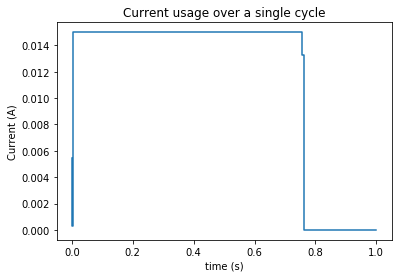

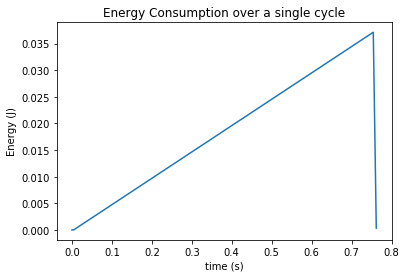

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import math 
%matplotlib inline

# Parameter Definition
Vdd = 3.3 #V
Rpu = 4700 #Ohms
Isink = -4e-3
Idds  = 750e-9
Idd   = 15e-3
Idq = 5e-6
Cio = 10e-12 # capacitance on line
res = 12 #bits
# time periods
tconv = 750/1000     #seconds
treset = 480/1000000 #seconds
tpresence = 240/1000000
twrite_low = 60/1000000
twrite_high = 45/100000 #15seconds after a write low
twrite_recovery = 1e-6


# Typical command structure:
#1: init 2: ROM function Command 3: Function Command 4: Transaction
Trom = 8*(twrite_high+ twrite_recovery)
Treset = treset+tpresence + 15e-6
#Sensors Cycle:
# 1: Reset 2: convert 3: Read 4: idle


T= Treset + Trom + tconv + 16*(twrite_high + twrite_recovery) # 16 bits

e_rom = 4*(Idd*15e-6)*Vdd+4*0.3*Idd*15e-6 # 33h command (0b00110011)
I_rom_avg = e_rom/(Vdd*Trom)

e_low = 0.3*Idd*treset
e_presence = 0.3*Idd*tpresence
e_pullup = 3.3*Idd*tpresence
e_convert = 3.3*Idd*tconv

#reading temp: each read is proceeded by a low for 60 seconds
e_low = 0.3*Idd*twrite_low
e_rec = Vdd*Idd*twrite_recovery
e_read_1_byte = Vdd*Idd*twrite_high +0.3*Idd*(twrite_low-twrite_high)

Tread = twrite_low+16*(twrite_high+15e-6)+15*(twrite_recovery)

e_read = 16*e_read_1_byte+15*e_rec +e_low  # for worst case i.e. 0b11111111111111111
I_read_avg = e_read/(Vdd*Tread)

#Reset energy concumption
e_init = e_low+e_presence+e_pullup

I_init_avg = e_init/(Vdd*Treset)

#plot cycle
t1 = Treset
t2 = t1+Trom
t3 = t2+tconv
t4 = t3+Tread
x  = [0,t1,t1,t2,t2,t3,t3,t4,t4,1]
y  = [I_init_avg,I_init_avg,I_rom_avg,I_rom_avg,Idd,Idd,I_read_avg,I_read_avg,Idds,Idds]


fig = plt.figure()
ax = plt.axes()
ax.plot(x,y)
ax.set_xlabel("time (s)")
ax.set_ylabel("Current (A)")
ax.set_title("Current usage over a single cycle")
x2  = [0,t1,t2,t3,t4]
y2 = [0,e_init,e_rom,e_convert,e_read]


# display values
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(x2,y2)
ax2.set_xlabel("time (s)")
ax2.set_ylabel("Energy (J)")
ax2.set_title("Energy Consumption over a single cycle")




# IMU

Energy consumption and current draw of a NXP 9dof breakout board 
device samples at 10Hz for 20 mins continuous

In [ ]:
#parameters
Vdd = 3.3
Idd_active  = 2.5e-3
Idd_rdy = 1.6e-3
Idd_stby = 2.8e-6

# basic cycle: 